In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

from bidi.algorithm import get_display
pd.options.display.max_rows = 1000
pd.set_option('display.max_columns', None)
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline; padding:10  px;"'),raw=True)
    
from anlysis_functions.funcs import get_groupby_plot, get_crosstab_table, get_distributions, get_groupby_data

In [7]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_palette("pastel")


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [8]:
df = pd.read_csv("/Users/shakedcaspi/work/mom/flu_corona/no_wf_data.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)
df.shape

(2024, 47)

In [9]:
df.no_corona_flu.value_counts()

0    1623
1     401
Name: no_corona_flu, dtype: int64

-----------

# Introduction
<p style="font-size:18px;">
The main question of this anlysis is to see if there is a change of people's assumptions about vaccinations because of the pandemic. <br/> 
Is Covid-19 raised people's awareness about the important of their health and particularly about influenza? or maybe it does the other way around? <br/>
I belive there are some key factors like gender, religion belive and age who caused a person not to want to vaccinate, <br/>
    Yet Covid 19 is changing people's perceptions about vaccination and this effect will be seen in the rate of this year flu patients. <br/>
In this data exploration I'll check my assumptions and later I'll run Logistic Regression and features importance (and REF) to verify it.
</p>

------

# The Dataset
<p style="font-size:16px;">
The data was generated from a survey that conducted in israel. <br/>
The survey is composed of questions about influenza and corona, when the main focus is on influenza <br/>
and the impact of Covid-19 on influenza related opinions like vaccination. <br/>
The data is independent and identically distributed sample of israel's population, which composed of 2024 data points. <br/>
Demographic and socio-economic data was also included in the dataset, as well as general information like gender, kids and etc.
</p>

-----

# Data Explorations

<p style="font-size:16px;">We can see that whereas there is 23% who doesn't want to vaccinate for corona. <br/>
    there is 48% who doesn't want to vaccinate for influenza. People grasp the Influenza as much less scarier than Corona. <br/>
    34% never vaccinated against influenza. <br/>
    54% didn't vaccinated last year.
</p>

In [10]:
display_side_by_side(get_distributions(df, "flu_vaccine_ever"), 
                     get_distributions(df, "flu_vaccine_last_year"), 
                     get_distributions(df, "flu_vaccine_fall"), 
                     get_distributions(df, "will_vaccinated_for_corona"))

,id,prec%
flu_vaccine_ever,,
0.0,690,34.09
1.0,1334,65.91
,id,prec%
flu_vaccine_last_year,,
0.0,1104,54.55
1.0,920,45.45
,id,prec%
flu_vaccine_fall,,
0.0,974,48.12


<p style="font-size:16px;">
    <h3>Gender</h3>
    <ul>
    <li> <b>Total Numbers:</b> <br/>
            - 52% females <br/>
            - 48% males. </li>
        <li> 19% of males don't want to vaccinate for Corona whereas 47% don't want to vaccinate for Influenza.</li>
        <li> 28% of males don't want to vaccinate for Corona whereas 50% don't want to vaccinate for Influenza.</li>
    </ul>
    25% of population are females who don't want to vaccinate against Influenza. 22% are males.<br>
    14% of population are females who don't want to vaccinate against Corona, 9% are males. <br/>
        <b> We can see that women don't want to vaccinate (Corona and Influenza), much more than men. </b>
</p>

In [11]:
print("\n Dict:      1 == 'FEMALE' ;  0 == 'MALE'\n\n")

gb1 = get_groupby_data(df, cols=["gender_f1"])
gb2 = get_groupby_data(df, cols=["flu_vaccine_fall", "gender_f1"])
gb3 = get_groupby_data(df, cols=["will_vaccinated_for_corona", "gender_f1"])

ct1, cs1 = get_crosstab_table(df, ["gender_f1"], "flu_vaccine_fall")
ct2, cs2 = get_crosstab_table(df, ["gender_f1"], "will_vaccinated_for_corona")
display_side_by_side(gb1,ct2,ct1)
print("_________________________________________________________________________________________________")
display_side_by_side(gb2,gb3)


 Dict:      1 == 'FEMALE' ;  0 == 'MALE'




gender_f1 
 count(id) 
 prec% 
 
 
 
 
 0 
 0.0 
 971 
 0.479743 
 
 
 1 
 1.0 
 1053 
 0.520257 
 
 
 
 
 
 will_vaccinated_for_corona 
 no 
 yes 
 no% 
 yes% 
 total 
 
 
 gender_f1 
 
 
 
 
 
 
 
 
 
 0.0 
 187 
 784 
 0.19 
 0.81 
 971 
 
 
 1.0 
 291 
 762 
 0.28 
 0.72 
 1053 
 
 
 
 
 
 flu_vaccine_fall 
 no 
 yes 
 no% 
 yes% 
 total 
 
 
 gender_f1 
 
 
 
 
 
 
 
 
 
 0.0 
 452 
 519 
 0.47 
 0.53 
 971 
 
 
 1.0 
 522 
 531 
 0.50 
 0.50 
 1053

_________________________________________________________________________________________________


,flu_vaccine_fall,gender_f1,count(id),prec%
0,0.0,0.0,452,0.223320
1,0.0,1.0,522,0.257905
2,1.0,0.0,519,0.256423
3,1.0,1.0,531,0.262352
,will_vaccinated_for_corona,gender_f1,count(id),prec%
0,0.0,0.0,187,0.092391
1,0.0,1.0,291,0.143775
2,1.0,0.0,784,0.387352
3,1.0,1.0,762,0.376482


<p style="font-size:16px;">
    <h3>Is Secular</h3>
    <ul>
        <li> <b>Total Numbers:</b> <br/>
                - 45.45% is secular <br/>
                - 45.55% isn't secular (include of Orthodox, traditional, religious) </li>
        <li> 41% of seculars don't want to vaccinate for corona whereas 20% don't want to vaccinate for influenza. </li>
        <li> 57% of religioins don't want to vaccinate for corona whereas 28% don't want to vaccinate for influenza. </li>
    </ul>
    25.88% of population are religious who don't want to vaccinate against Influenza. 22.22% are seculars.<br>
    12.89% of population are religious who don't want to vaccinate against Corona, 10.7% are seculars. <br/>
    <b> We can see that religious don't want to vaccinate (Corona and Influenza) little more than seculars.</b> </br>
    We can see that the difference in religious belief affect Corona vaccination much less than the difference in gender. </br>
    In the Influenza vaccinations, the numbers stay approximately the same.
    
    

</p>

In [12]:
gb = get_distributions(df, "is_secular")
ct1, cs1 = get_crosstab_table(df, ["is_secular"], "flu_vaccine_fall")
ct2, cs2 = get_crosstab_table(df, ["is_secular"], "will_vaccinated_for_corona")
gb2 = get_groupby_data(df, cols=["flu_vaccine_fall", "is_secular"])
gb3 = get_groupby_data(df, cols=["will_vaccinated_for_corona", "is_secular"])

display_side_by_side(gb,ct1,ct2)
print("_________________________________________________________________________________________________")
display_side_by_side(gb2,gb3)

id 
 prec% 
 
 
 is_secular 
 
 
 
 
 
 
 0 
 920 
 45.45 
 
 
 1 
 1104 
 54.55 
 
 
 
 
 
 flu_vaccine_fall 
 no 
 yes 
 no% 
 yes% 
 total 
 
 
 is_secular 
 
 
 
 
 
 
 
 
 
 0 
 524 
 396 
 0.57 
 0.43 
 920 
 
 
 1 
 450 
 654 
 0.41 
 0.59 
 1104 
 
 
 
 
 
 will_vaccinated_for_corona 
 no 
 yes 
 no% 
 yes% 
 total 
 
 
 is_secular 
 
 
 
 
 
 
 
 
 
 0 
 261 
 659 
 0.28 
 0.72 
 920 
 
 
 1 
 217 
 887 
 0.20 
 0.80 
 1104

_________________________________________________________________________________________________


,flu_vaccine_fall,is_secular,count(id),prec%
0,0.0,0,524,0.258893
1,0.0,1,450,0.222332
2,1.0,0,396,0.195652
3,1.0,1,654,0.323123
,will_vaccinated_for_corona,is_secular,count(id),prec%
0,0.0,0,261,0.128953
1,0.0,1,217,0.107213
2,1.0,0,659,0.325593
3,1.0,1,887,0.438241


<p style="font-size:16px;">
    <h3>Corona vaccination - Gender And Religious Belief</h3>
    We can see that being a female is stronger factor to cause someone to not want to vaccinations than being religious. </br>
    7.3% of population are religious women don't want to vaccinate against Corona. </br>
    5.5% of population are religious men don't want to vaccinate against Corona. </br>
    7.01% of population are secular women don't want to vaccinate against Corona. </br>
    3.7% of population are secular men don't want to vaccinate against Corona.
</p>

In [13]:
get_groupby_data(df, cols=["will_vaccinated_for_corona", "is_secular", "gender_f1"])

,will_vaccinated_for_corona,is_secular,gender_f1,count(id),prec%
0,0.0,0,0.0,112,0.055336
1,0.0,0,1.0,149,0.073617
2,0.0,1,0.0,75,0.037055
3,0.0,1,1.0,142,0.070158
4,1.0,0,0.0,327,0.161561
5,1.0,0,1.0,332,0.164032
6,1.0,1,0.0,457,0.225791
7,1.0,1,1.0,430,0.212451


<p style="font-size:16px;">
    <h3>Age Groups</h3>
    <ul>
        <li> 65-74 age group is the majority group that in favor of vaccination. </li>
        <li> Younger people tend to dismiss vaccinations. </li>
    </ul>
    <ul> <em><u> Influenza </u></em>
        <li> Between ages 0-50 within each age group the mean of people who doesn't want to vaccinate is 65.2%</li>    
        <li> Within 50-64 group there is 52% that doesn't want to vaccinate.</li>
        <li> Between ages 65-75+ there is a significant leap in the people who want to vaccinate, the mean of people who don't want to vaccinate is 23.5% </li>
    </ul>
    <ul> <em><u> Corona </u></em>
        <li> Between ages 0-64 within each age group the mean of people who doesn't want to vaccinate is 27.16%</li>    
        <li> Between ages 65-75+ there is a significant leap in the people who want to vaccinate, the mean of people who don't want to vaccinate is 15% </li>
    </ul>
</p>
<b>Conclusions:</b> Younger people tend to reject vaccinations. Corona is much more scarier to everybody than influenza.


<p style="font-size:16px;">
    <h3>Age Continuous Column</h3>
    <ul>
        <li>Mean age of people who don't to vaccinate for Corona and don't want to vaccinate against influenza is 43 </li>
        <li>Mean age of people who don't to vaccinate for Corona and want to vaccinate against influenza is 49 </li>
        <li>Mean age of people who to vaccinate for Corona and don't want to vaccinate against influenza is 40 </li>
        <li>Mean age of people who to vaccinate for Corona and want to vaccinate against influenza is 56 </li>
    </ul>
</p>

In [14]:
# delete this box in the end
#int(df[(df.will_vaccinated_for_corona == 0) & (df.flu_vaccine_fall==0)][["age_cont"]].mean()[0])
#int(df[(df.will_vaccinated_for_corona == 0) & (df.flu_vaccine_fall==1)][["age_cont"]].mean()[0])
#int(df[(df.will_vaccinated_for_corona == 1) & (df.flu_vaccine_fall==0)][["age_cont"]].mean()[0])
#int(df[(df.will_vaccinated_for_corona == 1) & (df.flu_vaccine_fall==1)][["age_cont"]].mean()[0])

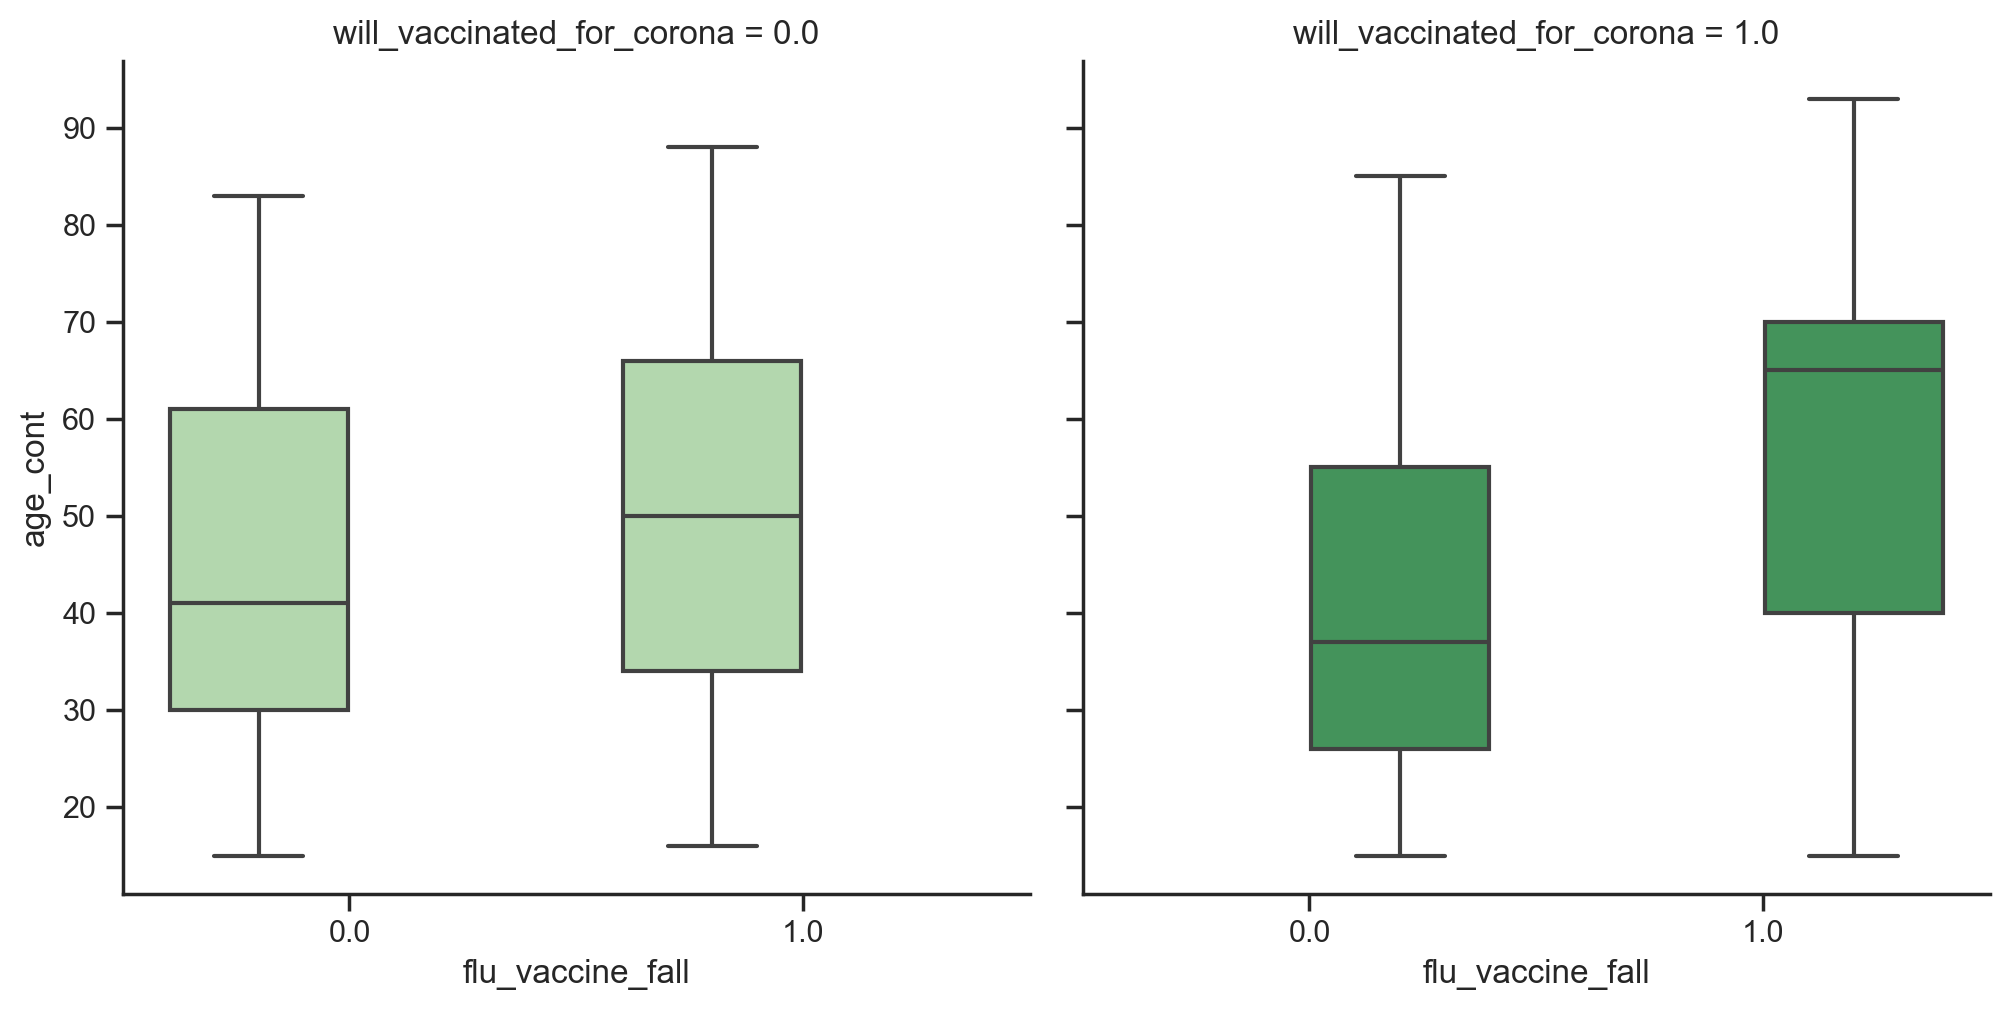

In [15]:
sns.catplot(x="flu_vaccine_fall", y="age_cont", hue="will_vaccinated_for_corona", col="will_vaccinated_for_corona", kind="box", 
            data=df, palette="Greens");

<p style="font-size:16px;">
    <h3>Never vaccinate against Influenza</h3>
    <ul>
        <li> <b>Total Numbers:</b> <br/>
                - 66% got vaccinate against the Influenza sometime in their life <br/>
                - 34% never vaccinated against Influenza.
        </li>
    </ul>
    <ul> <em><u> Never got vaccinated against Influenza </u></em>
        <li> 14.3% declare they want to vaccinate against the influenza next fall. </li>
        <li> 60.8% declare they want to vaccinate against Covid-19. </li>
   </ul>
   <ul> <em><u> Vaccinated against Influenza sometime in their life </u></em>
    <li> 71.2% declare they want to vaccinate against the influenza next fall. </li>
    <li> 84.4% declare they want to vaccinate against Covid-19. </li>
</ul>
</p>

In [16]:
display_side_by_side(get_groupby_data(df, ["flu_vaccine_ever"]))
print("\n\nTHESE TABLES CONTAINS ONLY PEOPLE WHO HAS DECLARE THEY NEVER VACCINATED AGAINS INFLUENZA\n")
display_side_by_side(get_groupby_data(df[df.flu_vaccine_ever==0], cols=["flu_vaccine_fall"]), 
                     get_groupby_data(df[df.flu_vaccine_ever==0], cols=["will_vaccinated_for_corona"]))
print("\n\nTHESE TABLES CONTAINS ONLY PEOPLE WHO HAS DECLARE THEY VACCINATED AGAINS INFLUENZA SOMETIME IN THEIR LIFE\n")
display_side_by_side(get_groupby_data(df[df.flu_vaccine_ever==1], cols=["flu_vaccine_fall"]), 
                     get_groupby_data(df[df.flu_vaccine_ever==1], cols=["will_vaccinated_for_corona"]))

,flu_vaccine_ever,count(id),prec%
0,0.0,690,0.340909
1,1.0,1334,0.659091




THESE TABLES CONTAINS ONLY PEOPLE WHO HAS DECLARE THEY NEVER VACCINATED AGAINS INFLUENZA



,flu_vaccine_fall,count(id),prec%
0,0.0,591,0.856522
1,1.0,99,0.143478
,will_vaccinated_for_corona,count(id),prec%
0,0.0,270,0.391304
1,1.0,420,0.608696




THESE TABLES CONTAINS ONLY PEOPLE WHO HAS DECLARE THEY VACCINATED AGAINS INFLUENZA SOMETIME IN THEIR LIFE



,flu_vaccine_fall,count(id),prec%
0,0.0,383,0.287106
1,1.0,951,0.712894
,will_vaccinated_for_corona,count(id),prec%
0,0.0,208,0.155922
1,1.0,1126,0.844078


<p style="font-size:16px;">
    <h3>Background Diseases</h3>
    <ul>
        <li> <b>Total Numbers:</b> <br/>
            - 1361 (67.2%) people who don't have background diseases. <br/>
            - 663 (32.8%) who has background diseases. <br/>
            * The distribution of people with background diseases is : <br/>
            <ol>
                <li> hypertension (10.4%)</li>
                <li> obesity (6.6%) </li>
                <li> diabetes (4.1%) </li>
                <li> other background diseases and combinations of these diseases (11.5%) </li>
           </ol>
   </ul>
</p>

In [17]:
only_diabetes = df[(df.diabetes == 1) & (df.hypertension == 0) & (df.obesity == 0)]
only_hypertension = df[(df.diabetes == 0) & (df.hypertension == 1) & (df.obesity == 0)]
only_obesity = df[(df.diabetes == 0) & (df.hypertension == 0) & (df.obesity == 1)]
tmp=get_groupby_data(df, cols=["diabetes", "hypertension", "obesity"])
tmp1=pd.Series({'diabetes':-1, 'hypertension':-1, 'obesity':-1})\
    .append(tmp[["count(id)", "prec%"]].iloc[[3,5,6,7]].sum())
tmp1=pd.DataFrame(tmp1).transpose()
tmp.drop([3,5,6,7], axis=0, inplace=True)
pd.concat([tmp, pd.DataFrame(tmp1)])

,diabetes,hypertension,obesity,count(id),prec%
0,0.0,0.0,0.0,1361.0,0.672431
1,0.0,0.0,1.0,135.0,0.066700
2,0.0,1.0,0.0,212.0,0.104743
4,1.0,0.0,0.0,83.0,0.041008
0,-1.0,-1.0,-1.0,233.0,0.115119


<p style="font-size:16px;">
    <h3>Diabetes</h3>
    <ul>
       <li> 22.8% of diabetes people don't want to vaccinate against Influenza.</li>
       <li> 10.8% of diabetes people don't want to vaccinate against Corona.</li>
   </ul>
   9.64% of people with diabetes never vaccinated against the Influenza in their life and now want to get Corona vaccination. </br>
   2.41% of people with diabetes never vaccinated against the Influenza in their life and now want to get Influenza vaccination.
</p>

ONLY DIABETES



,flu_vaccine_fall,count(id),prec%
0,0.0,19,0.228916
1,1.0,64,0.771084
,will_vaccinated_for_corona,count(id),prec%
0,0.0,9,0.108434
1,1.0,74,0.891566


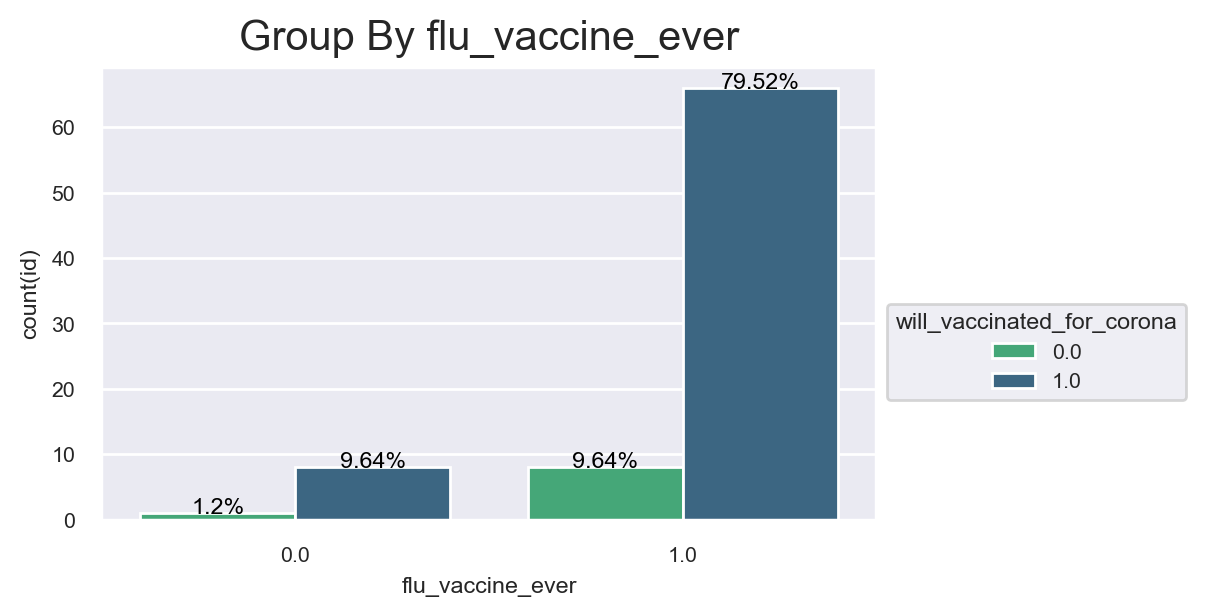

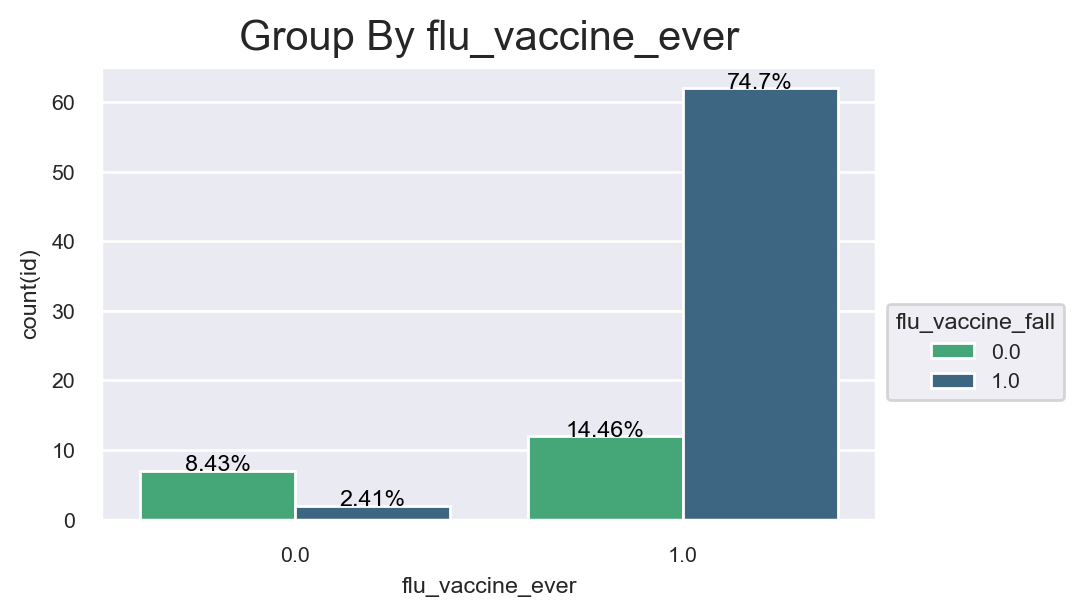

In [18]:
print("ONLY DIABETES\n")
gb1 = get_groupby_data(only_diabetes, cols=["flu_vaccine_fall"])
gb2 = get_groupby_data(only_diabetes, cols=["will_vaccinated_for_corona"])
display_side_by_side(gb1,gb2)
get_groupby_plot(only_diabetes, cols=["flu_vaccine_ever", "will_vaccinated_for_corona"], figsize=(5,3), with_prec=True, colors="viridis_r");
get_groupby_plot(only_diabetes, cols=["flu_vaccine_ever", "flu_vaccine_fall"], figsize=(5,3), with_prec=True, colors="viridis_r");

<p style="font-size:16px;">
    <h3>Hypertension</h3>
    <ul>
       <li> 28.3% of hypertension people don't want to vaccinate against Influenza.</li>
       <li> 15.09% of hypertension people don't want to vaccinate against Corona.</li>
   </ul>
   13.68% of people with hypertension never vaccinated against the Influenza in their life and now want to get Corona vaccination. </br>
   5.19% of people with hypertension never vaccinated against the Influenza in their life and now want to get Influenza vaccination.
</p>

ONLY HYPERTENSION


,flu_vaccine_fall,count(id),prec%
0,0.0,60,0.283019
1,1.0,152,0.716981
,will_vaccinated_for_corona,count(id),prec%
0,0.0,32,0.150943
1,1.0,180,0.849057


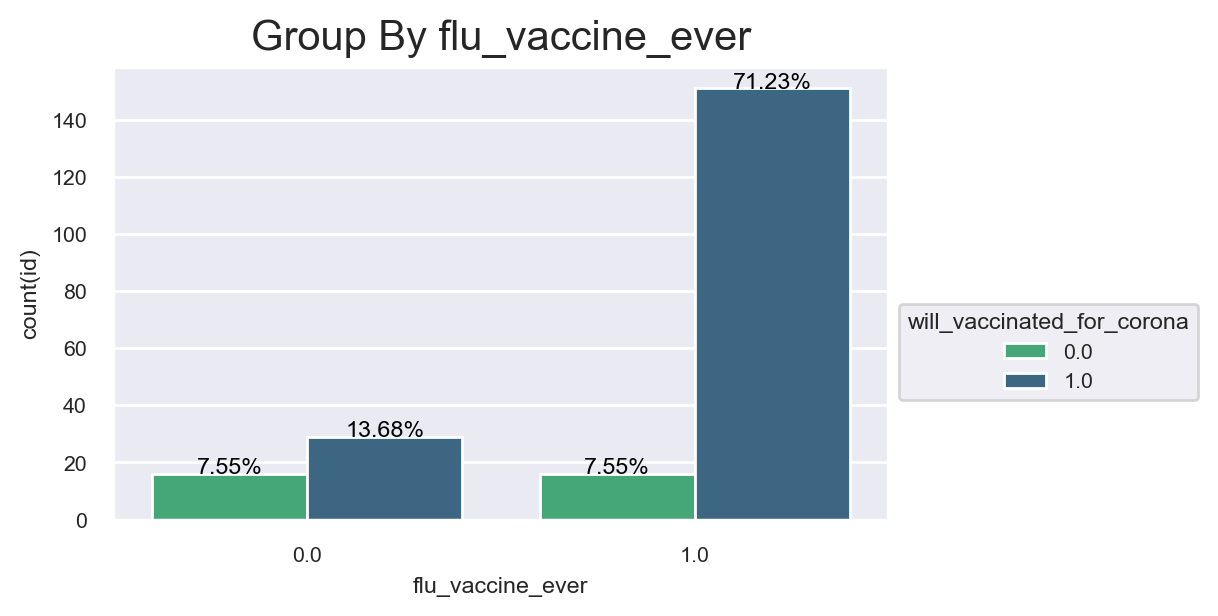

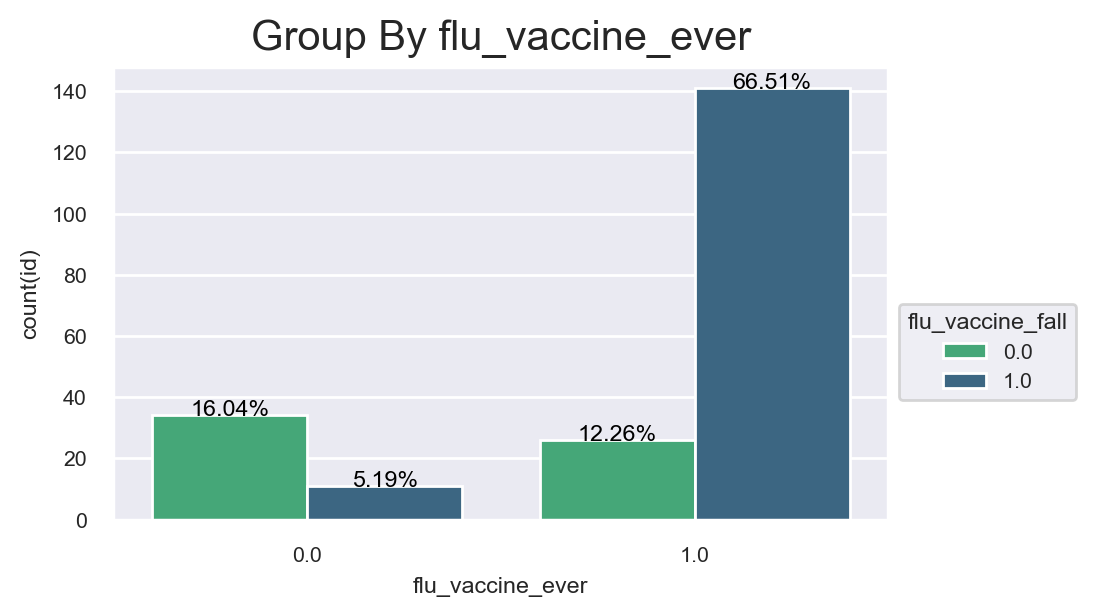

In [19]:
print("ONLY HYPERTENSION")
gb1 = get_groupby_data(only_hypertension, cols=["flu_vaccine_fall"])
gb2 = get_groupby_data(only_hypertension, cols=["will_vaccinated_for_corona"])
display_side_by_side(gb1,gb2)
get_groupby_plot(only_hypertension, cols=["flu_vaccine_ever", "will_vaccinated_for_corona"], figsize=(5,3), with_prec=True, colors="viridis_r");
get_groupby_plot(only_hypertension, cols=["flu_vaccine_ever", "flu_vaccine_fall"], figsize=(5,3), with_prec=True, colors="viridis_r");

<p style="font-size:16px;">
    <h3>Obesity</h3>
    <ul>
       <li> 46.6% of obesity people don't want to vaccinate against Influenza.</li>
       <li> 27.4% of obesity people don't want to vaccinate against Corona.</li>
   </ul>
   23.7% of people with obesity never vaccinated against the Influenza in their life and now want to get Corona vaccination. </br>
   6.67% of people with obesity never vaccinated against the Influenza in their life and now want to get Influenza vaccination.
</p>

ONLY OBESITY


,flu_vaccine_fall,count(id),prec%
0,0.0,63,0.466667
1,1.0,72,0.533333
,will_vaccinated_for_corona,count(id),prec%
0,0.0,37,0.274074
1,1.0,98,0.725926


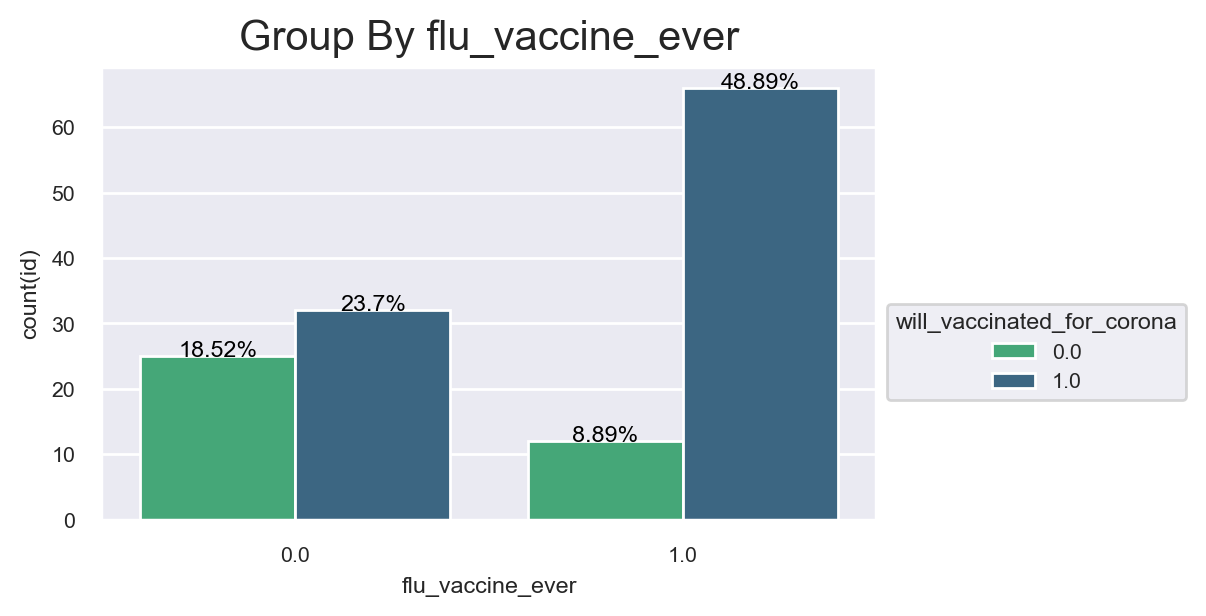

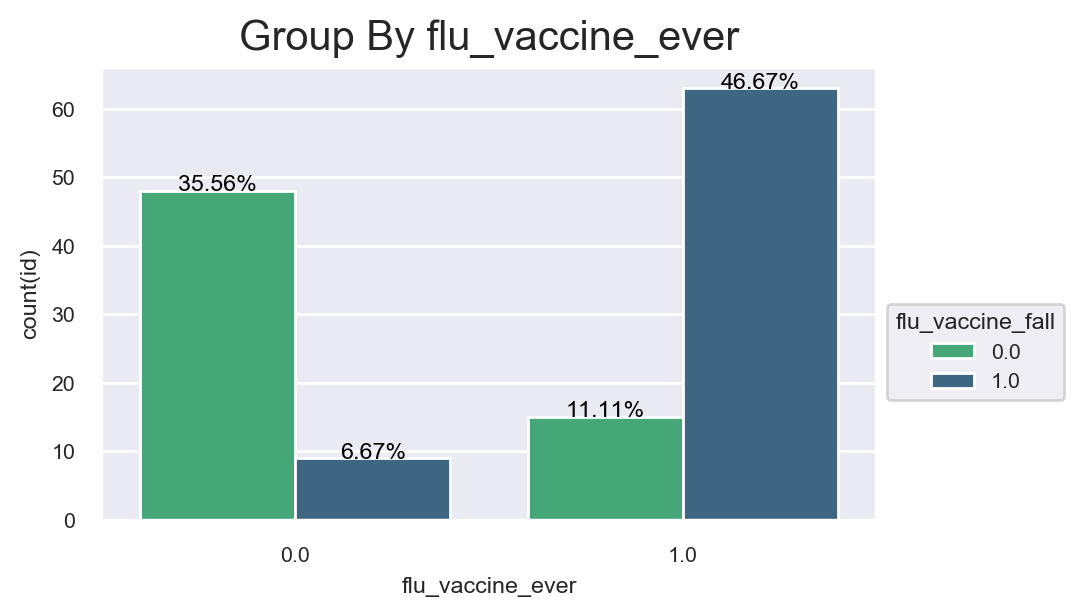

In [20]:
print("ONLY OBESITY")
gb1 = get_groupby_data(only_obesity, cols=["flu_vaccine_fall"])
gb2 = get_groupby_data(only_obesity, cols=["will_vaccinated_for_corona"])
display_side_by_side(gb1,gb2)
get_groupby_plot(only_obesity, cols=["flu_vaccine_ever", "will_vaccinated_for_corona"], figsize=(5,3), with_prec=True, colors="viridis_r");
get_groupby_plot(only_obesity, cols=["flu_vaccine_ever", "flu_vaccine_fall"], figsize=(5,3), with_prec=True, colors="viridis_r");

<p style="font-size:16px;">
    <h3>Background Diseases Conclusions</h3>
    <ul>
        <li>In all background diseases the percentage of people who change their mind about vaccination for Corona <br/>
                is bigger than Influenza vaccine. </li>
        <li>If you never got Influenza vaccine and you suffer from obesity there is the biggest chance you'll change you'r mind <br/>
                and this year will want to get vaccinations. </li>
        <li>There is solely 83 people in the dataset who has obesity, so maybe this small size cannot<br/>
                use for fully reliable statistical analysis. </li>
    </ul>
</p>

<p style="font-size:16px;">
    <h3>Education</h3>

</p>

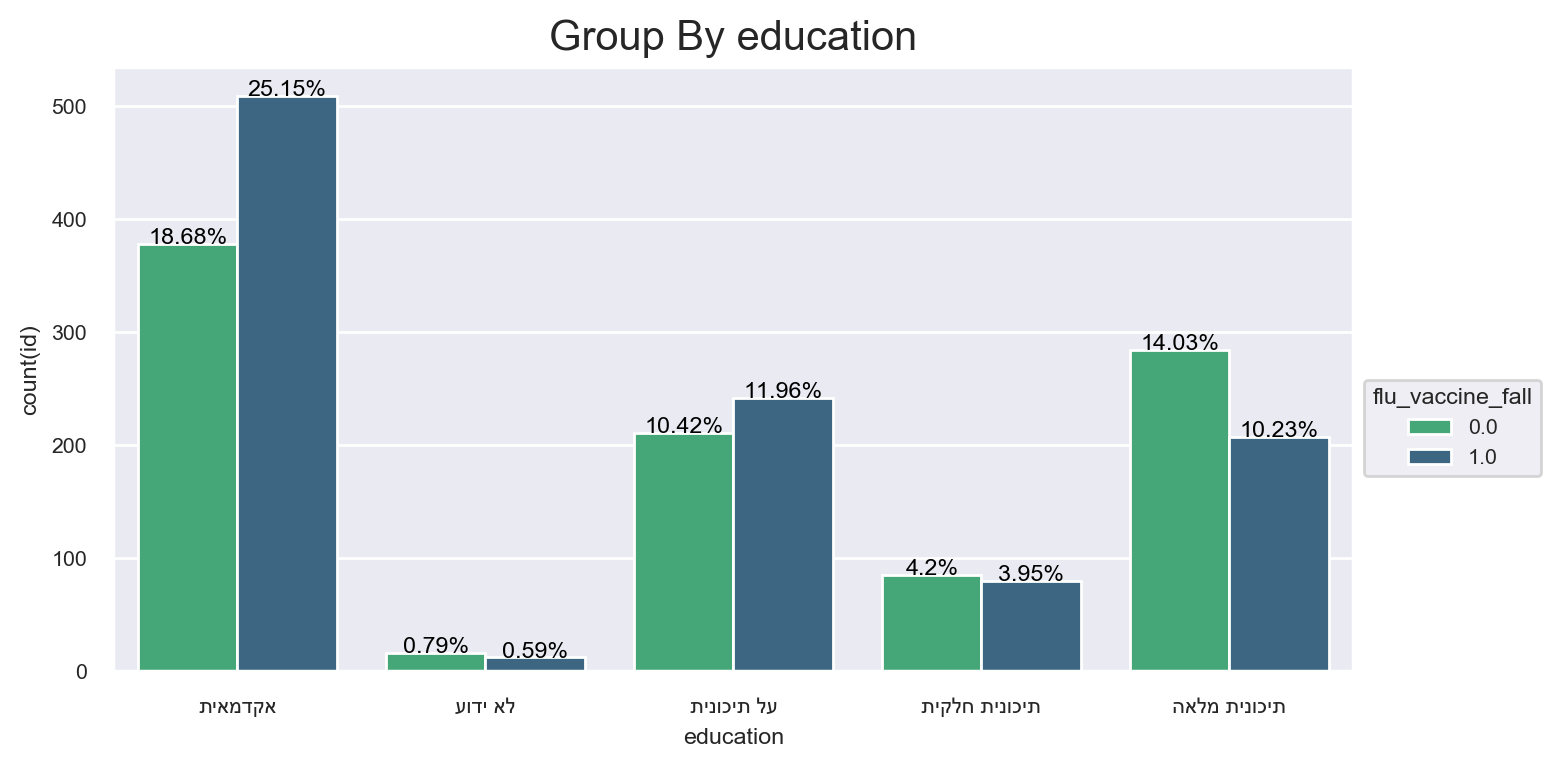

In [21]:
get_groupby_plot(df, cols=["education", "flu_vaccine_fall"], figsize=(8,4), colors="viridis_r");

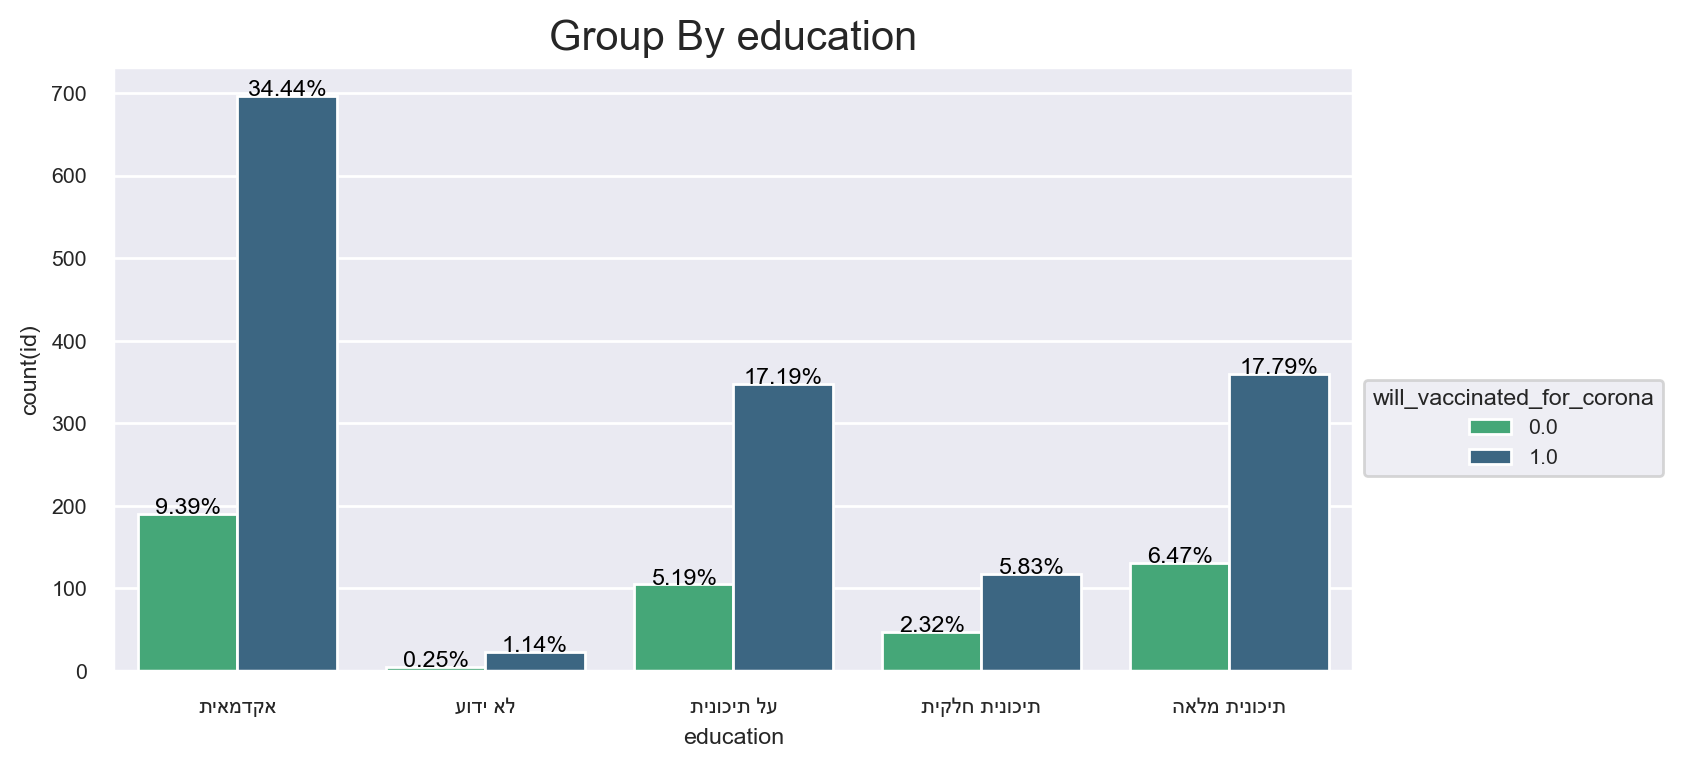

In [22]:
get_groupby_plot(df, cols=["education", "will_vaccinated_for_corona"], figsize=(8,4), colors="viridis_r");

# Chi Square Test For Independent

<p style="font-size:16px;">
    Using Chi Square test for independence to check whether there is independent variables <br/> between the two main columns:
    "flu_vaccine_fall", "will_vaccinated_for_corona" and the rest of the columns. <br/>
    Each point in the plot represent the p value that calcualted for each column with the target column. <br/>
    The red line marks the place where the p value should be 0.05. <br/>
    Below this line we consider the two variables as dependent. <br/>
    Above this line we consider the two variables as independent.
</p>

In [23]:
def check_dependent(df, target_col_name):
    cols = df.columns.tolist()
    cols.remove(target_col_name)
    res = pd.DataFrame()
    for col in cols:
        gb, tmp = get_crosstab_table(df, cols=[col], target_col=target_col_name)
        tmp.index.rename(col)
        res = pd.concat([res,tmp])
    return res

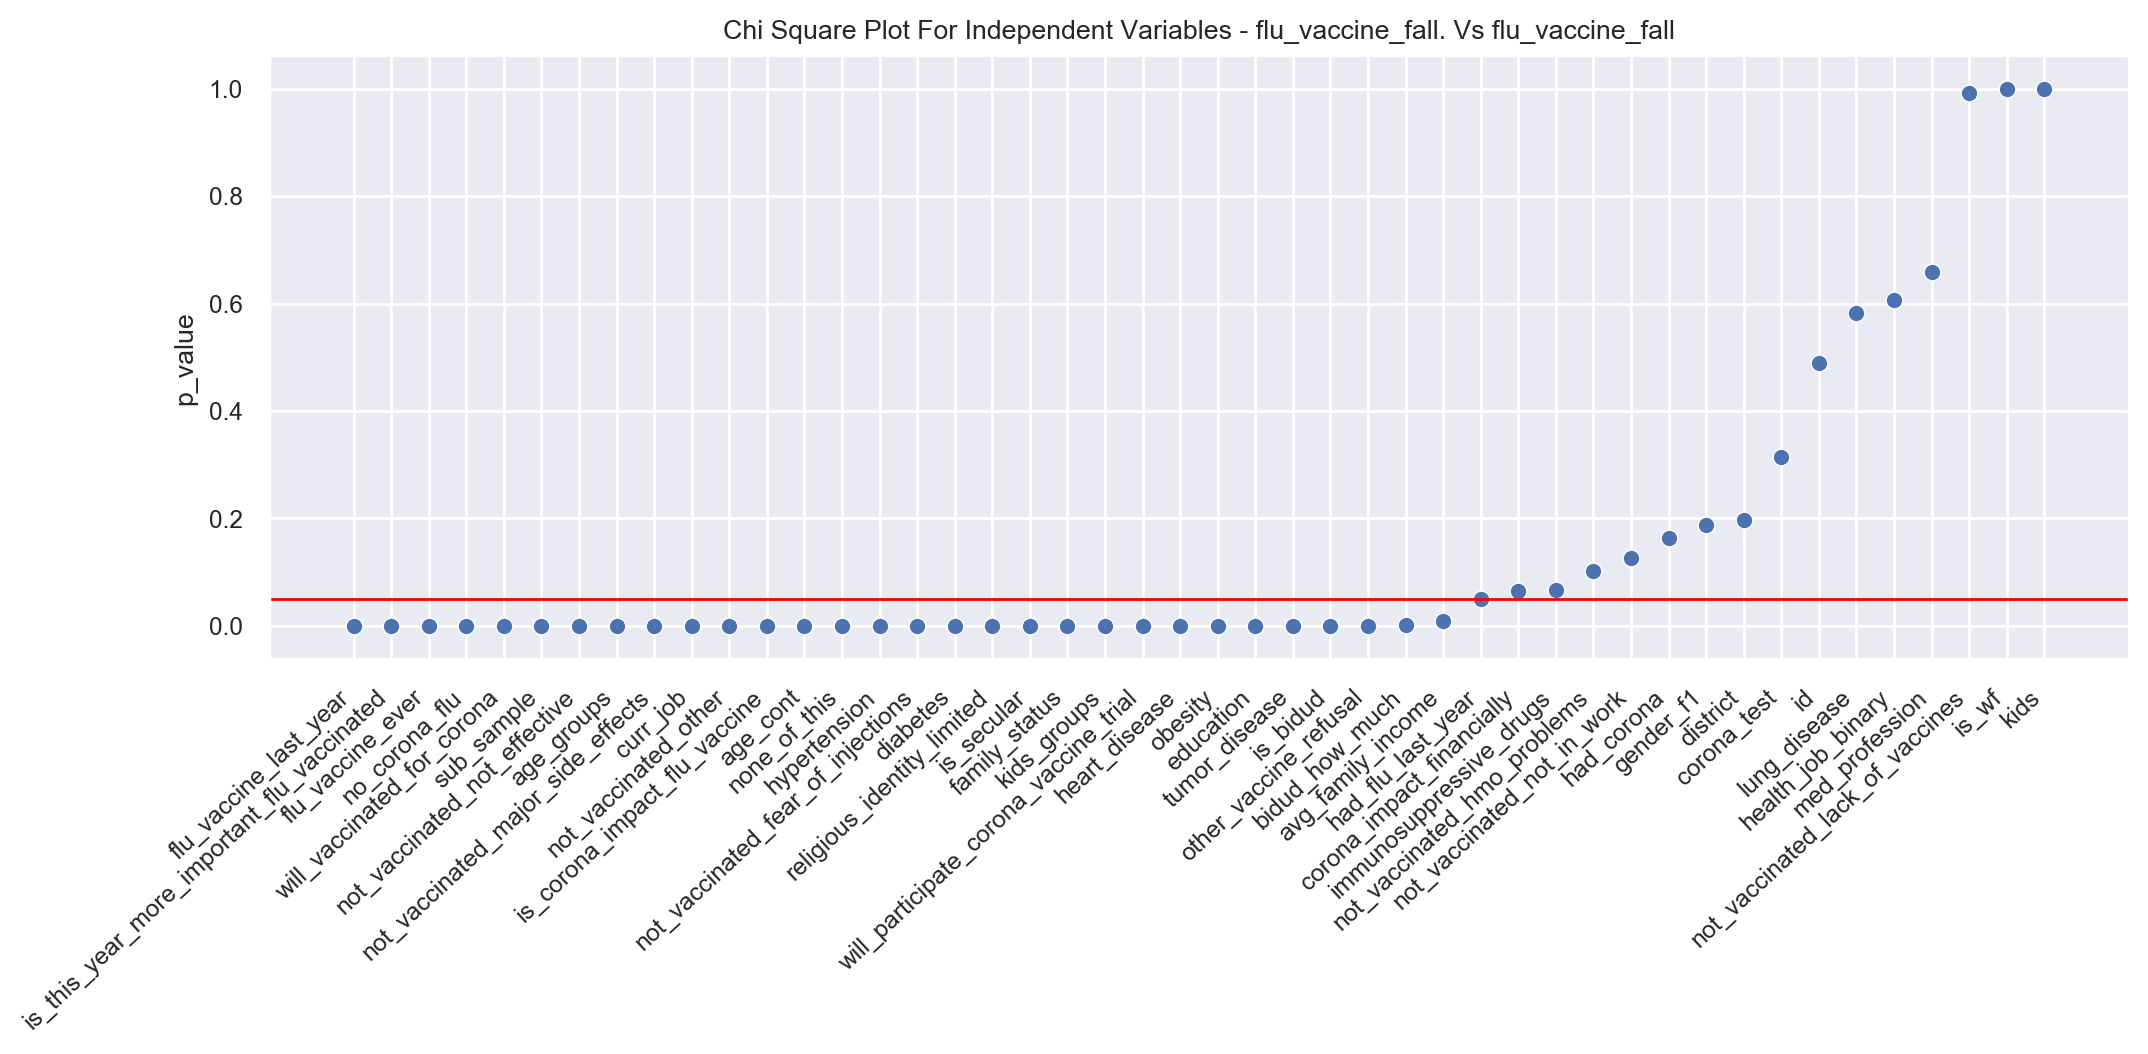

In [24]:
target = "flu_vaccine_fall"
cs1 = check_dependent(df, target).sort_values("p_value")
plt.figure(figsize=(12,4))
sns.set(font_scale=0.8)
plt.title("Chi Square Plot For Independent Variables - %s. Vs flu_vaccine_fall" % target)
plt.xticks(rotation=43, ha="right")
sns.scatterplot(x = cs1.index, y = cs1["p_value"])
plt.axhline(0.05, 0,1, c="red", lw=1);

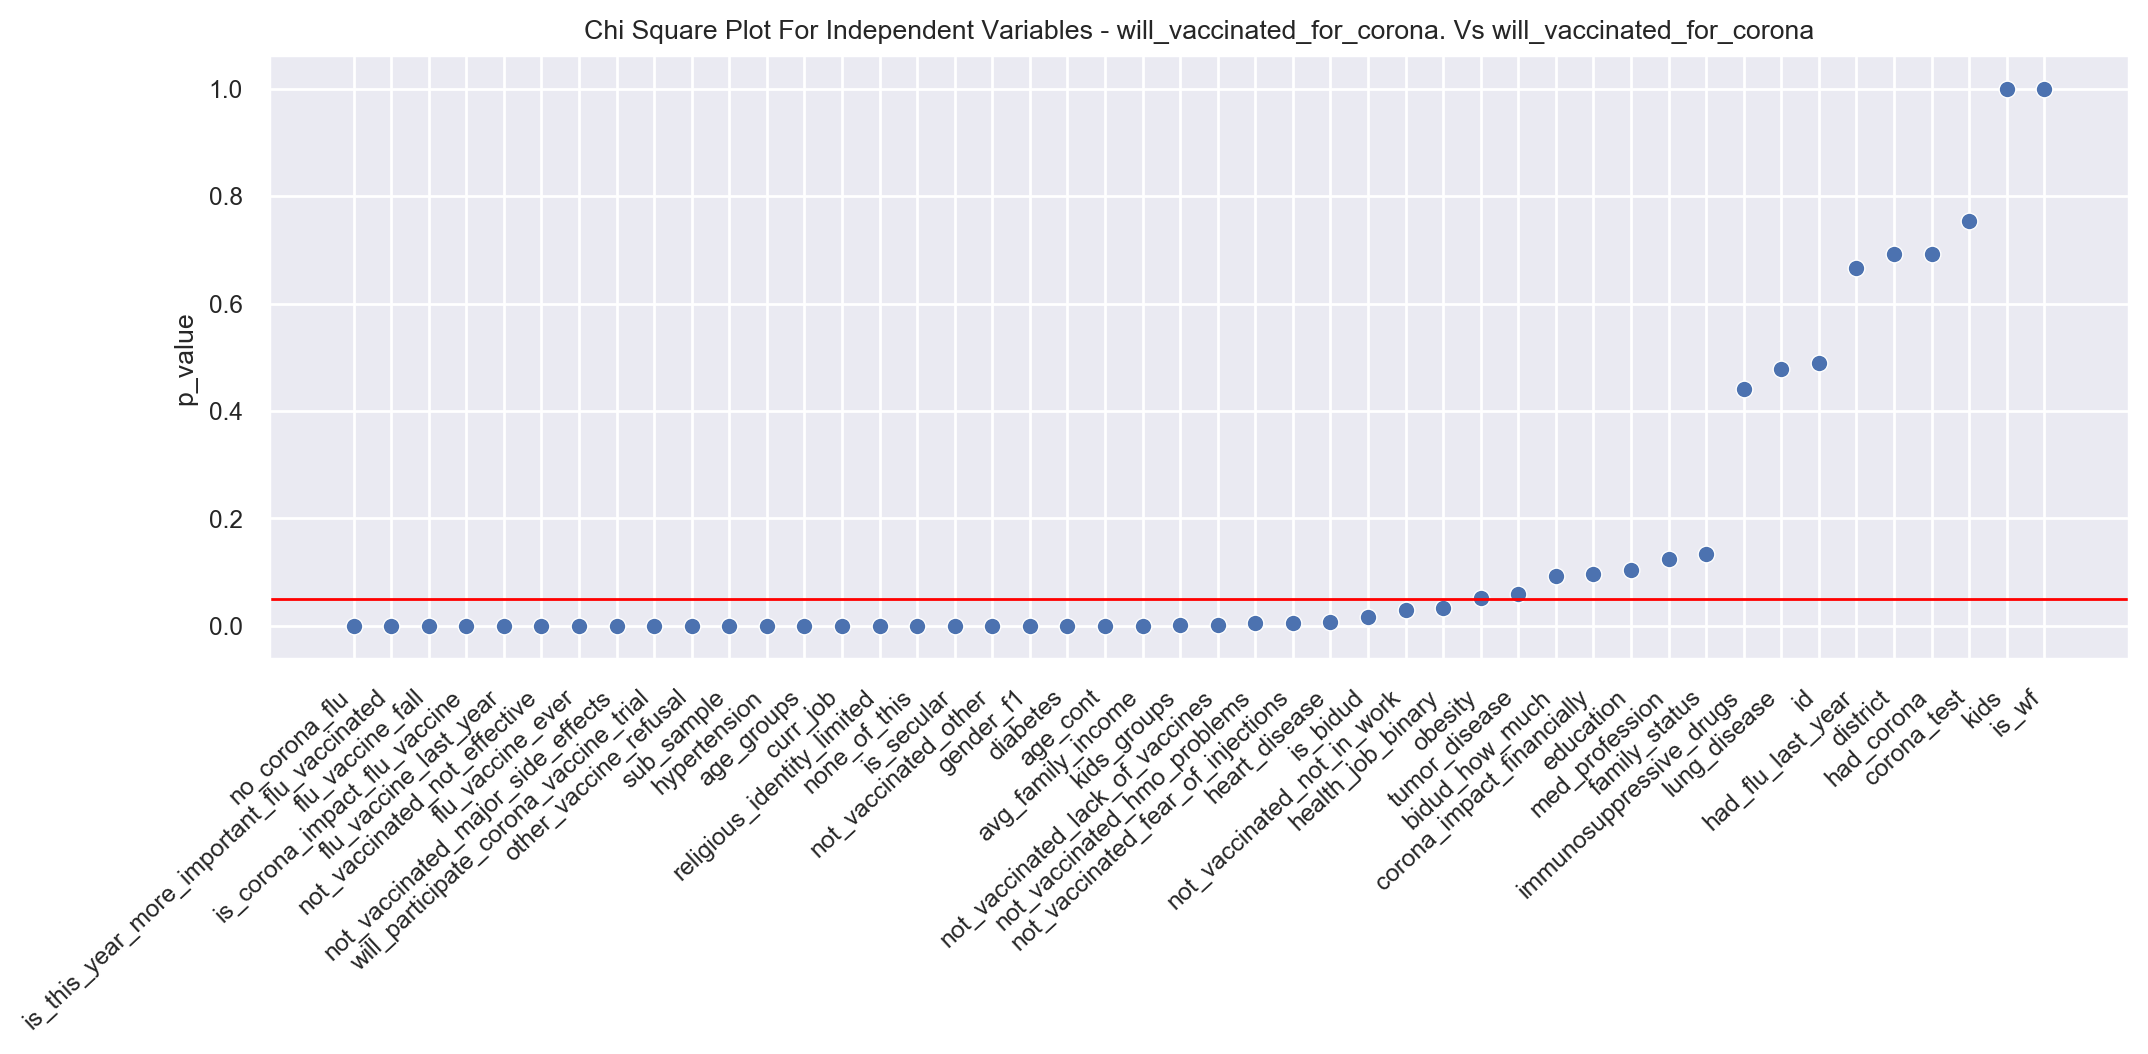

In [25]:
target = "will_vaccinated_for_corona"
cs1 = check_dependent(df, target).sort_values("p_value")
plt.figure(figsize=(12,4))
sns.set(font_scale=0.8)
plt.title("Chi Square Plot For Independent Variables - %s. Vs will_vaccinated_for_corona" % target)
plt.xticks(rotation=43, ha="right")
sns.scatterplot(x = cs1.index, y = cs1["p_value"])
plt.axhline(0.05, 0,1, c="red", lw=1);

# Bar Plot of age groups Vs 3 main columns

In [30]:
f = lambda x: (x*100) / float(x.sum())
gb_data = pd.DataFrame(index=df.age_groups.unique())
plotcols = ["flu_vaccine_fall", "flu_vaccine_last_year", "will_vaccinated_for_corona"]
for col in plotcols:
    gb_tmp = df.groupby(["age_groups", col]).count()[["id"]].transform(f).reset_index()
    
    gb_tmp = gb_tmp[gb_tmp[col] == 1.0].set_index("age_groups")
    gb_tmp.columns = [col,col+"_p"]
    gb_data = pd.merge(gb_data, gb_tmp[gb_tmp[col] == 1.0][col+"_p"], left_index=True, right_index=True)
gb_data.sort_index(inplace=True)

In [31]:
gb_data

,flu_vaccine_fall_p,flu_vaccine_last_year_p,will_vaccinated_for_corona_p
15-17,1.729249,1.630435,3.754941
18-20,0.839921,0.790514,2.025692
21-30,5.039526,4.100791,11.413043
31-40,6.027668,4.891304,10.770751
41-50,4.594862,2.964427,8.349802
51-64,6.669960,5.928854,10.573123
65-74,22.529644,20.750988,24.456522
75+,4.446640,4.397233,5.039526


In [32]:
gb_data.sum()

flu_vaccine_fall_p              51.877470
flu_vaccine_last_year_p         45.454545
will_vaccinated_for_corona_p    76.383399
dtype: float64

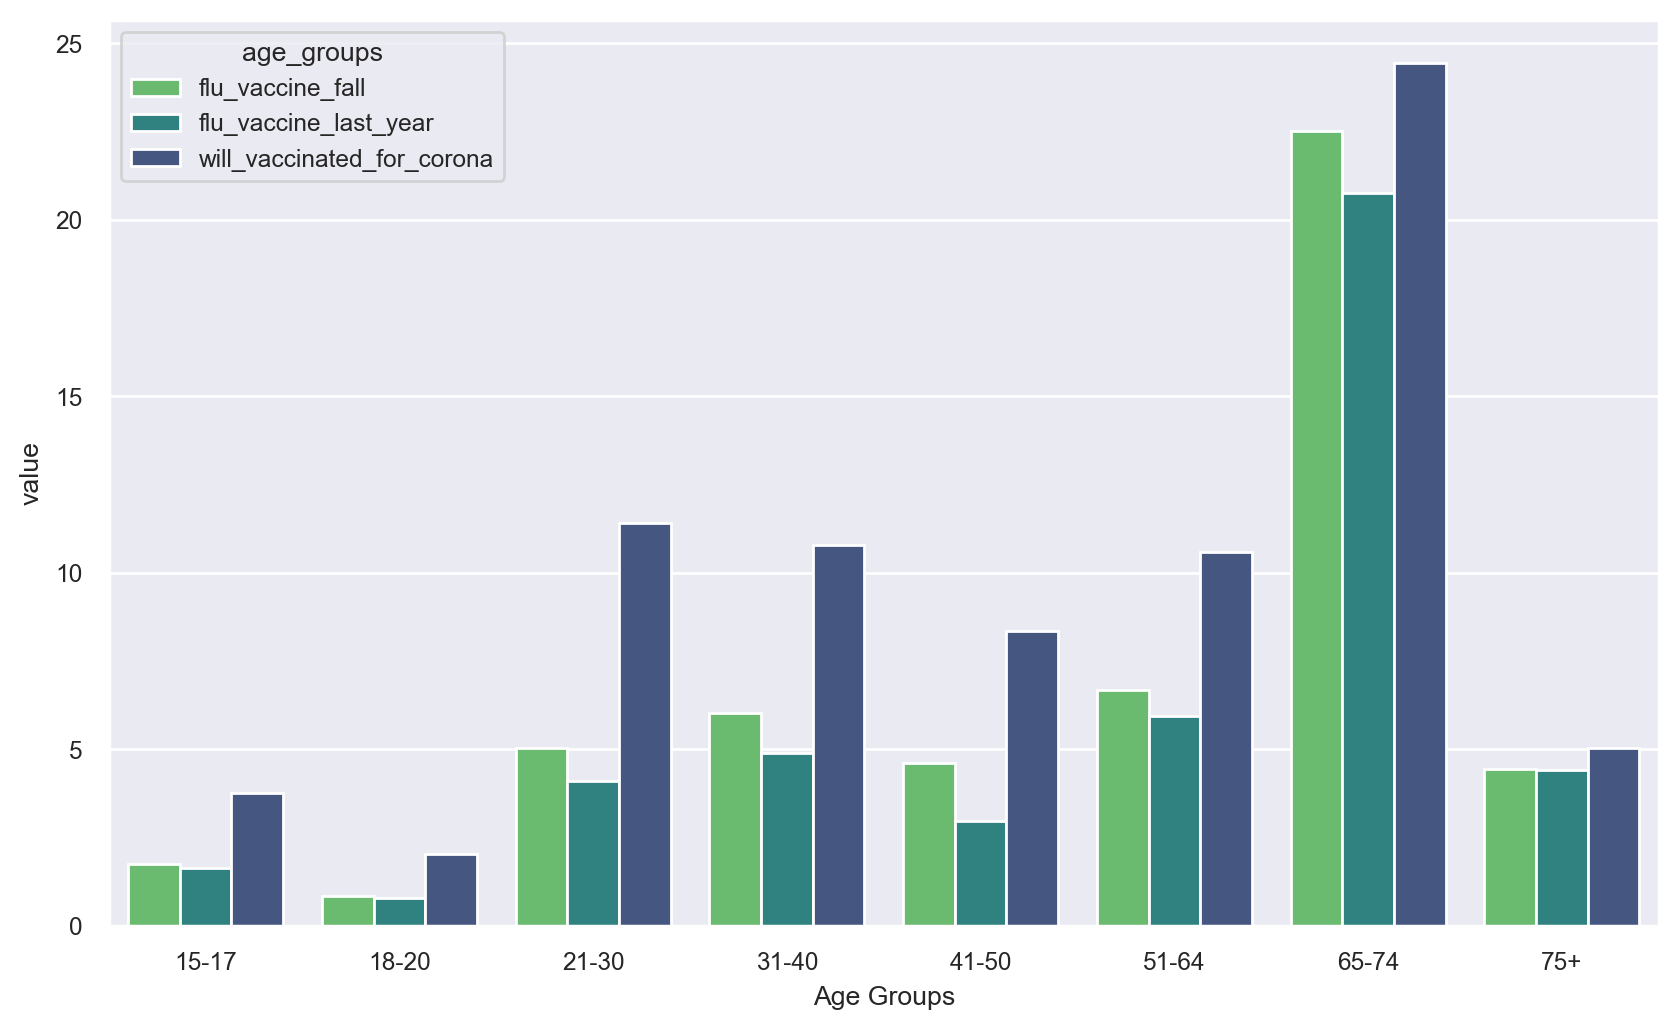

In [33]:
plt.figure(figsize=(10,6))
tmp=gb_data.reset_index().melt(id_vars='index', var_name='age_groups')
for value in tmp.age_groups.unique().tolist():
    tmp.age_groups.replace(value, value[:len(value)-2], inplace=True)
sns.barplot(x = "index", y = "value", hue="age_groups", data=tmp, palette="viridis_r");
plt.xlabel("Age Groups")
plt.savefig('barplot.png')

In [1]:
dsds

NameError: name 'dsds' is not defined